In [378]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Easy

In [379]:
df = pd.read_csv("results/easy_results.csv")

In [380]:
df.head()

,poly__degree,bagging__n_estimators,bagging__max_samples,bagging__max_features,accuracy,oob
0,1,10,0.2,0.2,0.770,0.84375
1,1,10,0.2,0.4,0.785,0.85125
2,1,10,0.2,0.6,0.825,0.85250
3,1,10,0.2,1.0,0.835,0.86875
4,1,10,0.4,0.2,0.765,0.82625


In [381]:
df.iloc[df['accuracy'].idxmax()]

poly__degree              2.00000
bagging__n_estimators    10.00000
bagging__max_samples      0.20000
bagging__max_features     0.60000
accuracy                  0.96500
oob                       0.92375
Name: 82, dtype: float64

In [382]:
df.iloc[df['accuracy'].idxmin()]

poly__degree              1.00000
bagging__n_estimators    10.00000
bagging__max_samples      0.40000
bagging__max_features     0.20000
accuracy                  0.76500
oob                       0.82625
Name: 4, dtype: float64

In [383]:
df.iloc[df['oob'].idxmax()]

poly__degree              2.00000
bagging__n_estimators    85.00000
bagging__max_samples      1.00000
bagging__max_features     0.60000
accuracy                  0.95000
oob                       0.95375
Name: 158, dtype: float64

In [384]:
df.iloc[df['oob'].idxmin()]

poly__degree              1.0000
bagging__n_estimators    10.0000
bagging__max_samples      1.0000
bagging__max_features     0.2000
accuracy                  0.7700
oob                       0.7925
Name: 12, dtype: float64

In [387]:
scaler = MinMaxScaler()

In [388]:
import matplotlib.cm as cm

/var/folders/_v/wtqndz5s2cqc5nfy735t040h0000gn/T/ipykernel_14964/2582203532.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', 4)


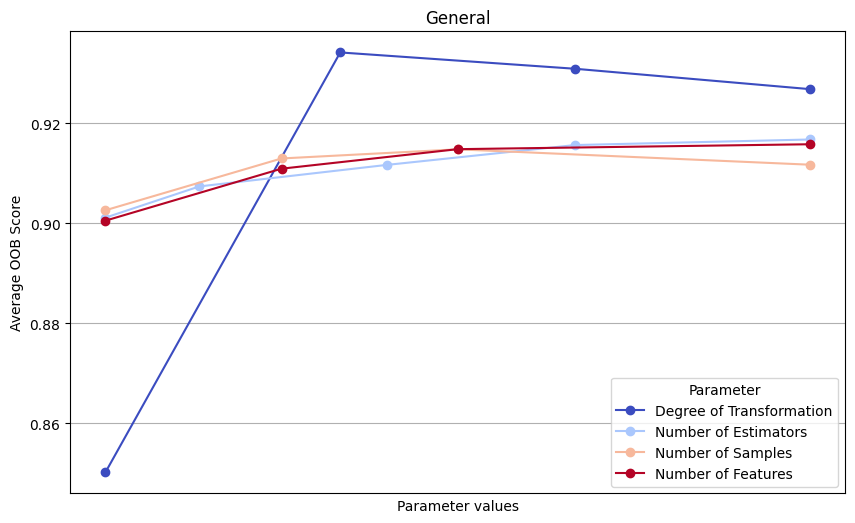

In [389]:
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('coolwarm', 4)

# Average OOB over the other columns for each poly__degree
df['poly_standar'] = scaler.fit_transform(df[['poly__degree']])
df_poly = df.groupby('poly_standar').mean()
plt.plot(df_poly.index, df_poly['oob'], marker='o', label='Degree of Transformation', color=colors(0))

# Average OOB over the other columns for each bagging__n_estimators
df['esti_standar'] = scaler.fit_transform(df[['bagging__n_estimators']])
df_estimators = df.groupby('esti_standar').mean()
plt.plot(df_estimators.index, df_estimators['oob'], marker='o', label='Number of Estimators', color=colors(1))

# Average OOB over the other columns for each bagging__max_samples
df['samp_standar'] = scaler.fit_transform(df[['bagging__max_samples']])
df_samples = df.groupby('samp_standar').mean()
plt.plot(df_samples.index, df_samples['oob'], marker='o', label='Number of Samples', color=colors(2))

# Average OOB over the other columns for each bagging__max_features
df['feat_standar'] = scaler.fit_transform(df[['bagging__max_features']])
df_features = df.groupby('feat_standar').mean()
plt.plot(df_features.index, df_features['oob'], marker='o', label='Number of Features', color=colors(3))

# Adding labels and title
plt.xlabel('Standardised Parameter values')
plt.ylabel('Average OOB Score')
#plt.title('General')
plt.legend(title='Parameter')
plt.xticks([])
plt.grid(True)
plt.savefig("result_plots/easy_line.pdf")
plt.show()

In [390]:
correlation = df['accuracy'].corr(df['poly__degree'])
print(f'Correlation between Accuracy and degree: {correlation}')

correlation = df['accuracy'].corr(df['bagging__n_estimators'])
print(f'Correlation between Accuracy and estimators: {correlation}')

correlation = df['accuracy'].corr(df['bagging__max_features'])
print(f'Correlation between Accuracy and features: {correlation}')


correlation = df['accuracy'].corr(df['bagging__max_samples'])
print(f'Correlation between Accuracy and samples: {correlation}')

Correlation between Accuracy and degree: 0.7033252884492196
Correlation between Accuracy and estimators: 0.07495823448432903
Correlation between Accuracy and features: 0.12587624068879077
Correlation between Accuracy and samples: 0.1102116418475188


In [391]:
correlation = df['oob'].corr(df['poly__degree'])
print(f'Correlation between Accuracy and degree: {correlation}')

correlation = df['oob'].corr(df['bagging__n_estimators'])
print(f'Correlation between Accuracy and estimators: {correlation}')

correlation = df['oob'].corr(df['bagging__max_features'])
print(f'Correlation between Accuracy and features: {correlation}')


correlation = df['oob'].corr(df['bagging__max_samples'])
print(f'Correlation between Accuracy and samples: {correlation}')

Correlation between Accuracy and degree: 0.6691948121899376
Correlation between Accuracy and estimators: 0.14170737794940053
Correlation between Accuracy and features: 0.13462642937479735
Correlation between Accuracy and samples: 0.07045722691435567


In [392]:
model = LinearRegression()
model.fit(df[['oob']], df['poly__degree'])
print(f'Regression coefficient: {model.coef_[0]}')
print(f'Regression intercept: {model.intercept_}')

Regression coefficient: 19.737338052725917
Regression intercept: -15.47184858370494


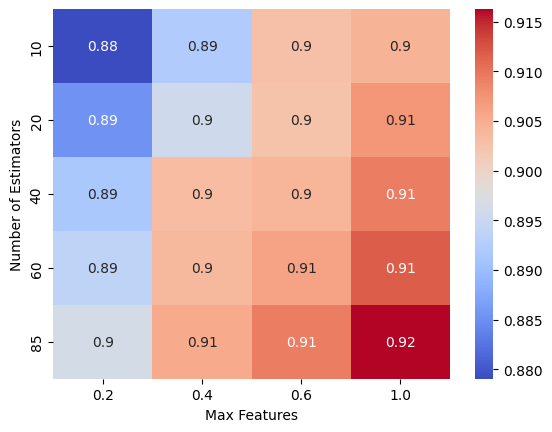

In [393]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='bagging__n_estimators', 
                             columns='bagging__max_features', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
#plt.title('Accuracy Heatmap')
plt.xlabel('Max Features')
plt.ylabel('Number of Estimators')
plt.show()

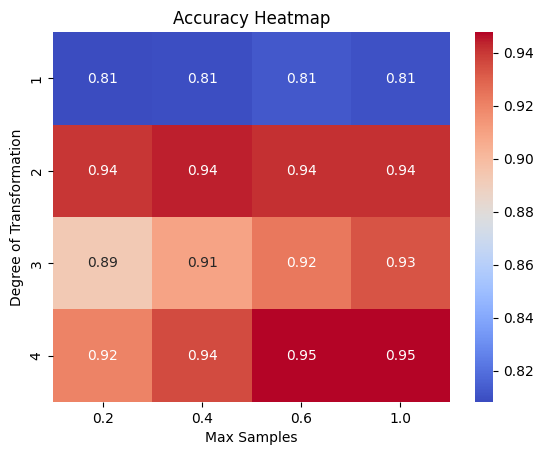

In [394]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='poly__degree', 
                             columns='bagging__max_samples', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
plt.title('Accuracy Heatmap')
plt.xlabel('Max Samples')
plt.ylabel('Degree of Transformation')
plt.show()

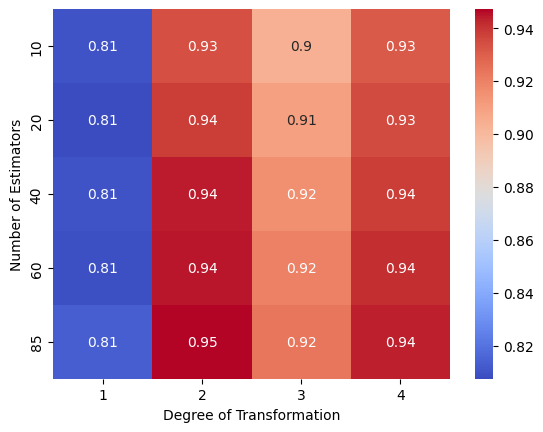

In [395]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='bagging__n_estimators', 
                             columns='poly__degree', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
#plt.title('Accuracy Heatmap')
plt.xlabel('Degree of Transformation')
plt.ylabel('Number of Estimators')
plt.show()


In [377]:
df.iloc[df[df['poly__degree'] == 1]['oob'].idxmax()]

poly__degree              1.000000
bagging__n_estimators    10.000000
bagging__max_samples      0.200000
bagging__max_features     1.000000
accuracy                  0.509167
oob                       0.492292
poly_standar              0.000000
esti_standar              0.000000
samp_standar              0.000000
feat_standar              1.000000
Name: 3, dtype: float64

In [ ]:
df.iloc[df[df['poly__degree'] != 1]['oob'].idxmax()]

# Spiral

In [452]:
df = pd.read_csv("results/spiral_results.csv")

In [453]:
df.head()

,poly__degree,bagging__n_estimators,bagging__max_samples,bagging__max_features,accuracy,oob
0,1,10,0.2,0.2,0.712500,0.75625
1,1,10,0.2,0.4,0.712500,0.75625
2,1,10,0.2,0.6,0.712500,0.75625
3,1,10,0.2,1.0,0.728125,0.75000
4,1,10,0.4,0.2,0.709375,0.75000


In [454]:
df.iloc[df['accuracy'].idxmax()]

poly__degree              3.0000
bagging__n_estimators    20.0000
bagging__max_samples      0.4000
bagging__max_features     1.0000
accuracy                  0.9875
oob                       0.9875
Name: 183, dtype: float64

In [455]:
df.iloc[df['accuracy'].idxmin()]

poly__degree              4.000000
bagging__n_estimators    40.000000
bagging__max_samples      0.200000
bagging__max_features     0.200000
accuracy                  0.693750
oob                       0.728906
Name: 272, dtype: float64

In [456]:
df.iloc[df['oob'].idxmax()]

poly__degree              4.000000
bagging__n_estimators    10.000000
bagging__max_samples      0.600000
bagging__max_features     1.000000
accuracy                  0.981250
oob                       0.990625
Name: 251, dtype: float64

In [457]:
df.iloc[df['oob'].idxmin()]

poly__degree              2.000000
bagging__n_estimators    10.000000
bagging__max_samples      1.000000
bagging__max_features     0.200000
accuracy                  0.706250
oob                       0.628906
Name: 92, dtype: float64

In [402]:
scaler = MinMaxScaler()

In [403]:
import matplotlib.cm as cm

/var/folders/_v/wtqndz5s2cqc5nfy735t040h0000gn/T/ipykernel_14964/2582203532.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', 4)


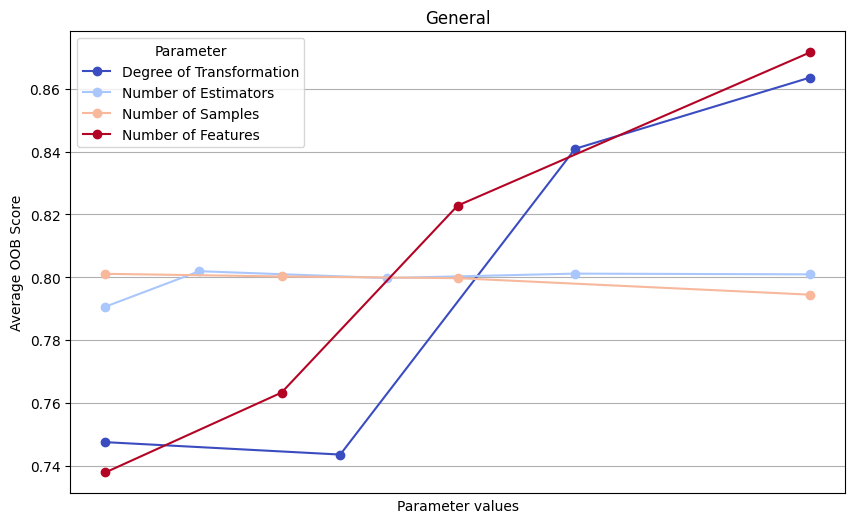

In [404]:
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('coolwarm', 4)

# Average OOB over the other columns for each poly__degree
df['poly_standar'] = scaler.fit_transform(df[['poly__degree']])
df_poly = df.groupby('poly_standar').mean()
plt.plot(df_poly.index, df_poly['oob'], marker='o', label='Degree of Transformation', color=colors(0))

# Average OOB over the other columns for each bagging__n_estimators
df['esti_standar'] = scaler.fit_transform(df[['bagging__n_estimators']])
df_estimators = df.groupby('esti_standar').mean()
plt.plot(df_estimators.index, df_estimators['oob'], marker='o', label='Number of Estimators', color=colors(1))

# Average OOB over the other columns for each bagging__max_samples
df['samp_standar'] = scaler.fit_transform(df[['bagging__max_samples']])
df_samples = df.groupby('samp_standar').mean()
plt.plot(df_samples.index, df_samples['oob'], marker='o', label='Number of Samples', color=colors(2))

# Average OOB over the other columns for each bagging__max_features
df['feat_standar'] = scaler.fit_transform(df[['bagging__max_features']])
df_features = df.groupby('feat_standar').mean()
plt.plot(df_features.index, df_features['oob'], marker='o', label='Number of Features', color=colors(3))

# Adding labels and title
plt.xlabel('Parameter values')
plt.ylabel('Average OOB Score')
#plt.title('General')
plt.legend(title='Parameter')
plt.xticks([])
plt.grid(True)
plt.savefig("result_plots/spiral_line.pdf")
plt.show()

In [405]:
correlation = df['accuracy'].corr(df['poly__degree'])
print(f'Correlation between Accuracy and degree: {correlation}')

correlation = df['accuracy'].corr(df['bagging__n_estimators'])
print(f'Correlation between Accuracy and estimators: {correlation}')

correlation = df['accuracy'].corr(df['bagging__max_features'])
print(f'Correlation between Accuracy and features: {correlation}')


correlation = df['accuracy'].corr(df['bagging__max_samples'])
print(f'Correlation between Accuracy and samples: {correlation}')

Correlation between Accuracy and degree: 0.5731028274488914
Correlation between Accuracy and estimators: -0.012200008092653768
Correlation between Accuracy and features: 0.5657989547529751
Correlation between Accuracy and samples: 0.0022178755101380466


In [406]:
model = LinearRegression()
model.fit(df[['oob']], df['poly__degree'])
print(f'Regression coefficient: {model.coef_[0]}')
print(f'Regression intercept: {model.intercept_}')

Regression coefficient: 6.949180312994181
Regression intercept: -3.051556960933274


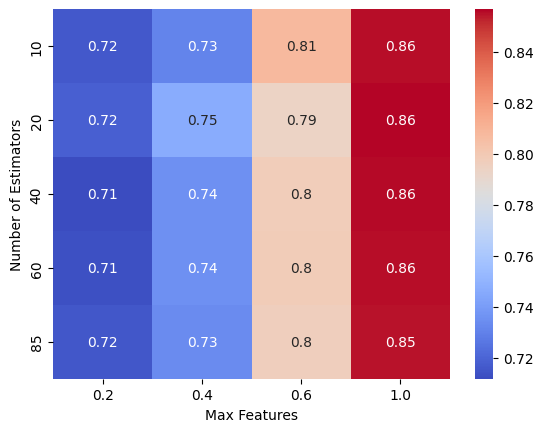

In [407]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='bagging__n_estimators', 
                             columns='bagging__max_features', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
#plt.title('Accuracy Heatmap')
plt.xlabel('Max Features')
plt.ylabel('Number of Estimators')
plt.show()

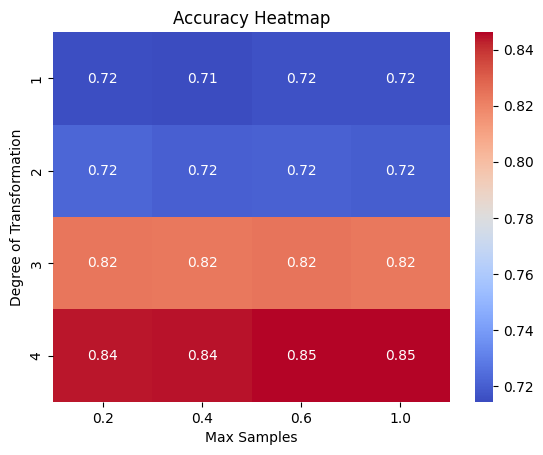

In [408]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='poly__degree', 
                             columns='bagging__max_samples', 
                             values='oob')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
#plt.title('Accuracy Heatmap')
plt.xlabel('Max Samples')
plt.ylabel('Degree of Transformation')
plt.savefig("result_plots/spiral_degree_.pdf")
plt.show()

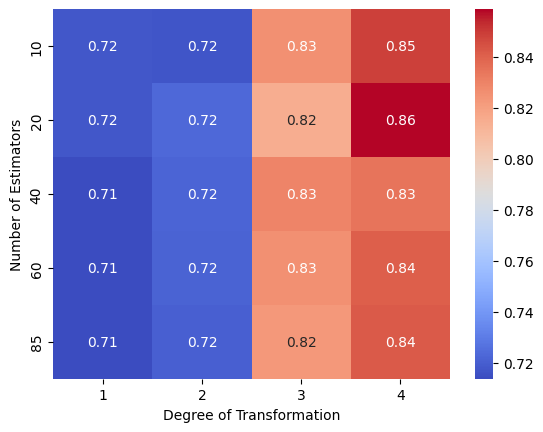

In [409]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='bagging__n_estimators', 
                             columns='poly__degree', 
                             values='oob')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
#plt.title('Accuracy Heatmap')
plt.xlabel('Degree of Transformation')
plt.ylabel('Number of Estimators')
plt.savefig("result_plots/spiral_degree_esti.pdf")
plt.show()


# Valid

In [503]:
df = pd.read_csv("results/outlier_results.csv")

In [504]:
df.head()

,poly__degree,bagging__n_estimators,bagging__max_samples,bagging__max_features,accuracy,oob
0,1,10,0.2,0.2,0.681250,0.668229
1,1,10,0.2,0.4,0.681250,0.668229
2,1,10,0.2,0.6,0.681250,0.668229
3,1,10,0.2,1.0,0.481250,0.466146
4,1,10,0.4,0.2,0.685417,0.650000


In [505]:
df.iloc[df['accuracy'].idxmax()]

poly__degree              4.000000
bagging__n_estimators    20.000000
bagging__max_samples      1.000000
bagging__max_features     1.000000
accuracy                  0.912500
oob                       0.909375
Name: 271, dtype: float64

In [506]:
df.iloc[df['accuracy'].idxmin()]

poly__degree              1.000000
bagging__n_estimators    10.000000
bagging__max_samples      0.400000
bagging__max_features     1.000000
accuracy                  0.472917
oob                       0.458854
Name: 7, dtype: float64

In [507]:
df.iloc[df['oob'].idxmax()]

poly__degree              4.000000
bagging__n_estimators    20.000000
bagging__max_samples      1.000000
bagging__max_features     1.000000
accuracy                  0.912500
oob                       0.909375
Name: 271, dtype: float64

In [508]:
df.iloc[df['oob'].idxmin()]

poly__degree              1.000000
bagging__n_estimators    10.000000
bagging__max_samples      0.400000
bagging__max_features     1.000000
accuracy                  0.472917
oob                       0.458854
Name: 7, dtype: float64

In [509]:
scaler = MinMaxScaler()

In [510]:
import matplotlib.cm as cm

/var/folders/_v/wtqndz5s2cqc5nfy735t040h0000gn/T/ipykernel_14964/2582203532.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', 4)


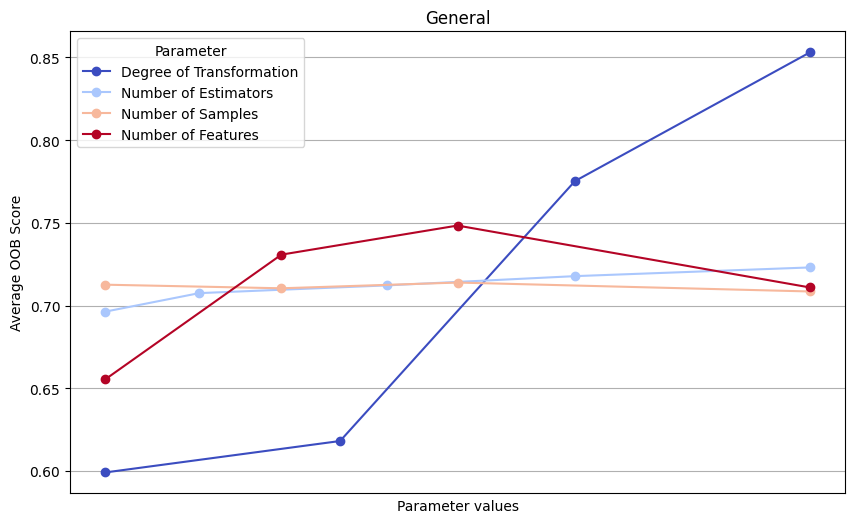

In [511]:
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('coolwarm', 4)

# Average OOB over the other columns for each poly__degree
df['poly_standar'] = scaler.fit_transform(df[['poly__degree']])
df_poly = df.groupby('poly_standar').mean()
plt.plot(df_poly.index, df_poly['oob'], marker='o', label='Degree of Transformation', color=colors(0))

# Average OOB over the other columns for each bagging__n_estimators
df['esti_standar'] = scaler.fit_transform(df[['bagging__n_estimators']])
df_estimators = df.groupby('esti_standar').mean()
plt.plot(df_estimators.index, df_estimators['oob'], marker='o', label='Number of Estimators', color=colors(1))

# Average OOB over the other columns for each bagging__max_samples
df['samp_standar'] = scaler.fit_transform(df[['bagging__max_samples']])
df_samples = df.groupby('samp_standar').mean()
plt.plot(df_samples.index, df_samples['oob'], marker='o', label='Number of Samples', color=colors(2))

# Average OOB over the other columns for each bagging__max_features
df['feat_standar'] = scaler.fit_transform(df[['bagging__max_features']])
df_features = df.groupby('feat_standar').mean()
plt.plot(df_features.index, df_features['oob'], marker='o', label='Number of Features', color=colors(3))

# Adding labels and title
plt.xlabel('StandardisedParameter values')
plt.ylabel('Average OOB Score')
#plt.title('General')
plt.legend(title='Parameter')
plt.xticks([])
plt.grid(True)
plt.savefig("result_plots/valid_line.pdf")
plt.show()

In [512]:
correlation = df['oob'].corr(df['poly__degree'])
print(f'Correlation between Accuracy and degree: {correlation}')

correlation = df['oob'].corr(df['bagging__n_estimators'])
print(f'Correlation between Accuracy and estimators: {correlation}')

correlation = df['oob'].corr(df['bagging__max_features'])
print(f'Correlation between Accuracy and features: {correlation}')


correlation = df['oob'].corr(df['bagging__max_samples'])
print(f'Correlation between Accuracy and samples: {correlation}')

Correlation between Accuracy and degree: 0.7574953891528086
Correlation between Accuracy and estimators: 0.06426299396736306
Correlation between Accuracy and features: 0.11433789645374554
Correlation between Accuracy and samples: -0.009051504961405492


In [489]:
model = LinearRegression()
model.fit(df[['oob']], df['poly__degree'])
print(f'Regression coefficient: {model.coef_[0]}')
print(f'Regression intercept: {model.intercept_}')

Regression coefficient: 7.389407030519698
Regression intercept: -3.0765487939892697


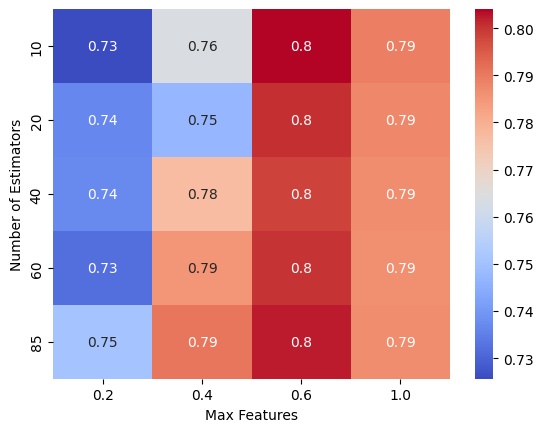

In [490]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='bagging__n_estimators', 
                             columns='bagging__max_features', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
#plt.title('Accuracy Heatmap')
plt.xlabel('Max Features')
plt.ylabel('Number of Estimators')
plt.show()

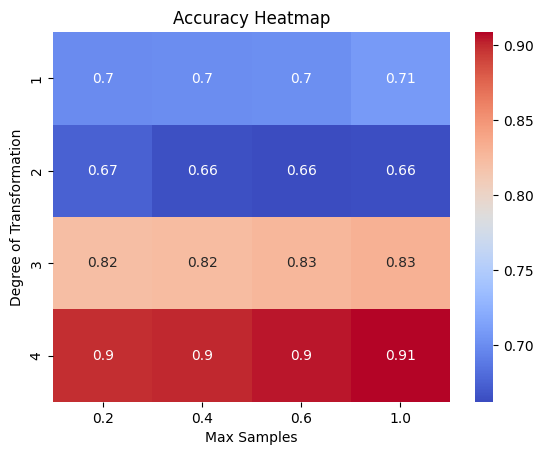

In [491]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='poly__degree', 
                             columns='bagging__max_samples', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
plt.title('Accuracy Heatmap')
plt.xlabel('Max Samples')
plt.ylabel('Degree of Transformation')
plt.show()

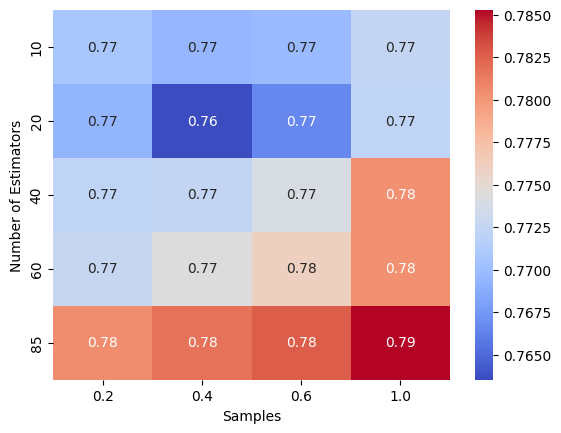

In [492]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='bagging__n_estimators', 
                             columns='bagging__max_samples', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
#plt.title('Accuracy Heatmap')
plt.xlabel('Samples')
plt.ylabel('Number of Estimators')
plt.show()


# Irrelevant

In [542]:
df = pd.read_csv("results/irrelevant_results.csv")

In [543]:
df.head()

,poly__degree,bagging__n_estimators,bagging__max_samples,bagging__max_features,accuracy,oob
0,1,10,0.2,0.2,0.664286,0.741071
1,1,10,0.2,0.4,0.800000,0.816071
2,1,10,0.2,0.6,0.850000,0.876786
3,1,10,0.2,1.0,0.842857,0.876786
4,1,10,0.4,0.2,0.728571,0.741071


In [544]:
df.iloc[df['accuracy'].idxmax()]

poly__degree              2.000000
bagging__n_estimators    60.000000
bagging__max_samples      0.200000
bagging__max_features     0.200000
accuracy                  0.857143
oob                       0.839286
Name: 128, dtype: float64

In [545]:
df.iloc[df['accuracy'].idxmin()]

poly__degree              1.000000
bagging__n_estimators    10.000000
bagging__max_samples      0.200000
bagging__max_features     0.200000
accuracy                  0.664286
oob                       0.741071
Name: 0, dtype: float64

In [546]:
df.iloc[df['oob'].idxmax()]

poly__degree              1.0000
bagging__n_estimators    20.0000
bagging__max_samples      0.2000
bagging__max_features     1.0000
accuracy                  0.8500
oob                       0.8875
Name: 19, dtype: float64

In [547]:
df.iloc[df['oob'].idxmin()]

poly__degree              1.000000
bagging__n_estimators    10.000000
bagging__max_samples      1.000000
bagging__max_features     0.200000
accuracy                  0.735714
oob                       0.633929
Name: 12, dtype: float64

In [548]:
scaler = MinMaxScaler()

In [549]:
import matplotlib.cm as cm

/var/folders/_v/wtqndz5s2cqc5nfy735t040h0000gn/T/ipykernel_14964/3404254250.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', 4)


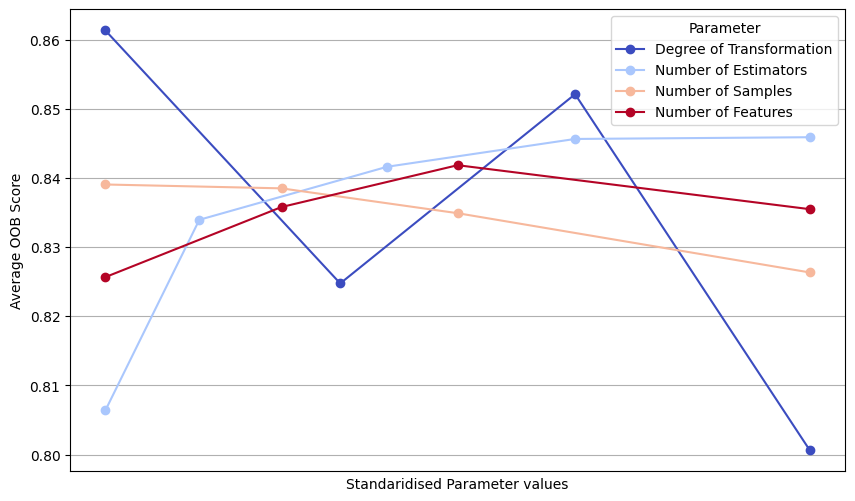

In [550]:
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('coolwarm', 4)

# Average OOB over the other columns for each poly__degree
df['poly_standar'] = scaler.fit_transform(df[['poly__degree']])
df_poly = df.groupby('poly_standar').mean()
plt.plot(df_poly.index, df_poly['oob'], marker='o', label='Degree of Transformation', color=colors(0))

# Average OOB over the other columns for each bagging__n_estimators
df['esti_standar'] = scaler.fit_transform(df[['bagging__n_estimators']])
df_estimators = df.groupby('esti_standar').mean()
plt.plot(df_estimators.index, df_estimators['oob'], marker='o', label='Number of Estimators', color=colors(1))

# Average OOB over the other columns for each bagging__max_samples
df['samp_standar'] = scaler.fit_transform(df[['bagging__max_samples']])
df_samples = df.groupby('samp_standar').mean()
plt.plot(df_samples.index, df_samples['oob'], marker='o', label='Number of Samples', color=colors(2))

# Average OOB over the other columns for each bagging__max_features
df['feat_standar'] = scaler.fit_transform(df[['bagging__max_features']])
df_features = df.groupby('feat_standar').mean()
plt.plot(df_features.index, df_features['oob'], marker='o', label='Number of Features', color=colors(3))

# Adding labels and title
# Adding labels and title
plt.xlabel('Standaridised Parameter values')
plt.ylabel('Average OOB Score')
plt.legend(title='Parameter')
plt.savefig("result_plots/irrelvant_line.pdf")
plt.xticks([])
plt.grid(True)
plt.show()

In [551]:
correlation = df['oob'].corr(df['poly__degree'])
print(f'Correlation between Accuracy and degree: {correlation}')

correlation = df['oob'].corr(df['bagging__n_estimators'])
print(f'Correlation between Accuracy and estimators: {correlation}')

correlation = df['oob'].corr(df['bagging__max_features'])
print(f'Correlation between Accuracy and features: {correlation}')


correlation = df['oob'].corr(df['bagging__max_samples'])
print(f'Correlation between Accuracy and samples: {correlation}')

Correlation between Accuracy and degree: -0.4673719850719624
Correlation between Accuracy and estimators: 0.3158503729386071
Correlation between Accuracy and features: 0.08461986017888898
Correlation between Accuracy and samples: -0.1334615369237308


In [552]:
model = LinearRegression()
model.fit(df[['oob']], df['poly__degree'])
print(f'Regression coefficient: {model.coef_[0]}')
print(f'Regression intercept: {model.intercept_}')

Regression coefficient: -14.106902760370156
Regression intercept: 14.275091562463212


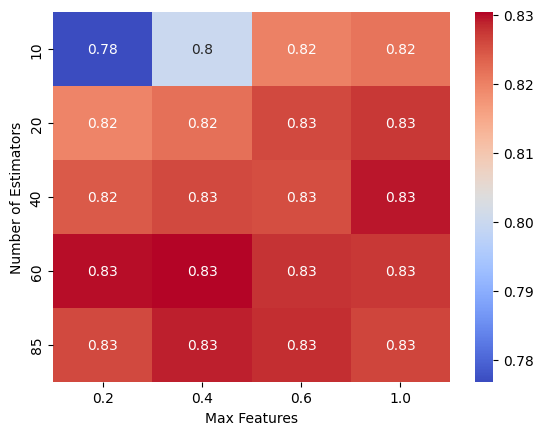

In [553]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='bagging__n_estimators', 
                             columns='bagging__max_features', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
#plt.title('Accuracy Heatmap')
plt.xlabel('Max Features')
plt.ylabel('Number of Estimators')
plt.show()

# THIS ONE

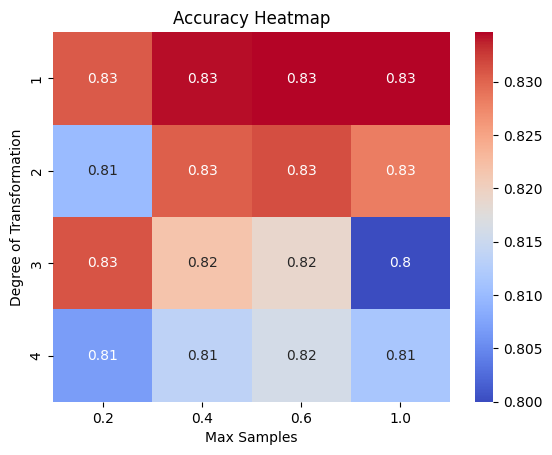

In [557]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='poly__degree', 
                             columns='bagging__max_samples', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
plt.title('Accuracy Heatmap')
plt.xlabel('Max Samples')
plt.ylabel('Degree of Transformation')
plt.savefig("result_plots/irrelvant_degree_samples.pdf")
plt.show()

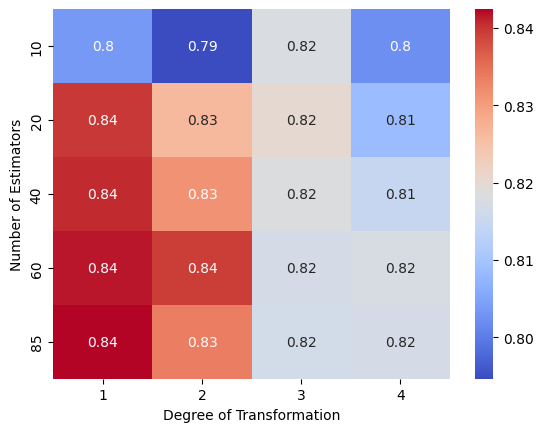

In [437]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='bagging__n_estimators', 
                             columns='poly__degree', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
#plt.title('Accuracy Heatmap')
plt.xlabel('Degree of Transformation')
plt.ylabel('Number of Estimators')
plt.show()


# Circle

In [524]:
df = pd.read_csv("results/circle_results.csv")

In [525]:
df.head()

,poly__degree,bagging__n_estimators,bagging__max_samples,bagging__max_features,accuracy,oob
0,1,10,0.2,0.2,0.486667,0.481458
1,1,10,0.2,0.4,0.490833,0.481875
2,1,10,0.2,0.6,0.493333,0.490625
3,1,10,0.2,1.0,0.509167,0.492292
4,1,10,0.4,0.2,0.451667,0.477917


In [526]:
df.iloc[df['accuracy'].idxmax()]

poly__degree              3.000000
bagging__n_estimators    10.000000
bagging__max_samples      0.600000
bagging__max_features     1.000000
accuracy                  0.843333
oob                       0.825000
Name: 171, dtype: float64

In [527]:
df.iloc[df['accuracy'].idxmin()]

poly__degree              1.000000
bagging__n_estimators    20.000000
bagging__max_samples      0.400000
bagging__max_features     0.200000
accuracy                  0.440833
oob                       0.450417
Name: 20, dtype: float64

In [528]:
df.iloc[df['oob'].idxmax()]

poly__degree              4.000000
bagging__n_estimators    60.000000
bagging__max_samples      0.200000
bagging__max_features     0.600000
accuracy                  0.834167
oob                       0.827917
Name: 290, dtype: float64

In [529]:
df.iloc[df['oob'].idxmin()]

poly__degree              1.000000
bagging__n_estimators    85.000000
bagging__max_samples      0.600000
bagging__max_features     0.400000
accuracy                  0.451667
oob                       0.437500
Name: 73, dtype: float64

In [530]:
scaler = MinMaxScaler()

In [531]:
import matplotlib.cm as cm

/var/folders/_v/wtqndz5s2cqc5nfy735t040h0000gn/T/ipykernel_14964/3107635764.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', 4)


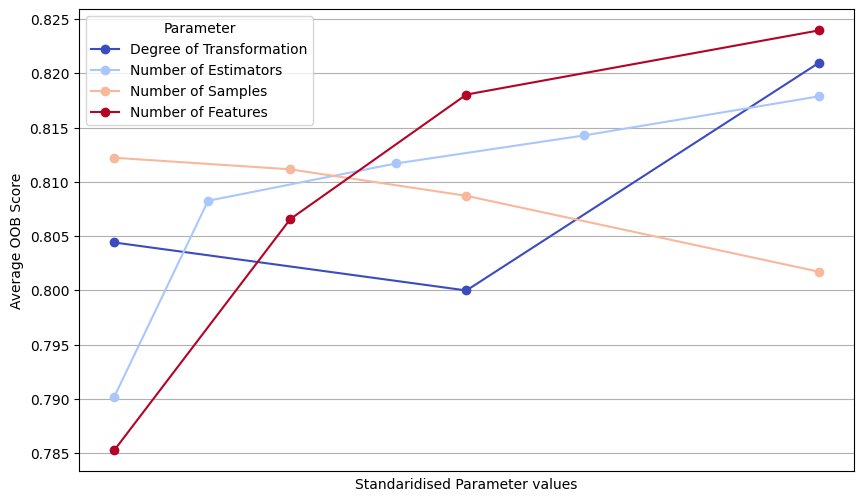

In [540]:
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('coolwarm', 4)

# Average OOB over the other columns for each poly__degree
df['poly_standar'] = scaler.fit_transform(df[['poly__degree']])
df_poly = df.groupby('poly_standar').mean()
plt.plot(df_poly.index, df_poly['oob'], marker='o', label='Degree of Transformation', color=colors(0))

# Average OOB over the other columns for each bagging__n_estimators
df['esti_standar'] = scaler.fit_transform(df[['bagging__n_estimators']])
df_estimators = df.groupby('esti_standar').mean()
plt.plot(df_estimators.index, df_estimators['oob'], marker='o', label='Number of Estimators', color=colors(1))

# Average OOB over the other columns for each bagging__max_samples
df['samp_standar'] = scaler.fit_transform(df[['bagging__max_samples']])
df_samples = df.groupby('samp_standar').mean()
plt.plot(df_samples.index, df_samples['oob'], marker='o', label='Number of Samples', color=colors(2))

# Average OOB over the other columns for each bagging__max_features
df['feat_standar'] = scaler.fit_transform(df[['bagging__max_features']])
df_features = df.groupby('feat_standar').mean()
plt.plot(df_features.index, df_features['oob'], marker='o', label='Number of Features', color=colors(3))

# Adding labels and title
plt.xlabel('Standaridised Parameter values')
plt.ylabel('Average OOB Score')
plt.legend(title='Parameter')
plt.savefig("result_plots/circle_line.pdf")
plt.xticks([])
plt.grid(True)
plt.show()

In [533]:
correlation = df['oob'].corr(df['poly__degree'])
print(f'Correlation between Accuracy and degree: {correlation}')

correlation = df['oob'].corr(df['bagging__n_estimators'])
print(f'Correlation between Accuracy and estimators: {correlation}')

correlation = df['oob'].corr(df['bagging__max_features'])
print(f'Correlation between Accuracy and features: {correlation}')


correlation = df['oob'].corr(df['bagging__max_samples'])
print(f'Correlation between Accuracy and samples: {correlation}')

Correlation between Accuracy and degree: 0.7906626631270125
Correlation between Accuracy and estimators: 0.033126545444096926
Correlation between Accuracy and features: 0.07710706586521344
Correlation between Accuracy and samples: -0.023311167584301826


In [448]:
model = LinearRegression()
model.fit(df[['oob']], df['poly__degree'])
print(f'Regression coefficient: {model.coef_[0]}')
print(f'Regression intercept: {model.intercept_}')

Regression coefficient: 5.84900504102915
Regression intercept: -1.7238536592548144


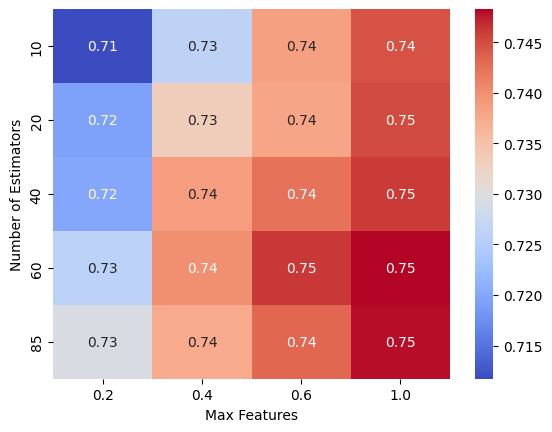

In [449]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='bagging__n_estimators', 
                             columns='bagging__max_features', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
#plt.title('Accuracy Heatmap')
plt.xlabel('Max Features')
plt.ylabel('Number of Estimators')
plt.show()

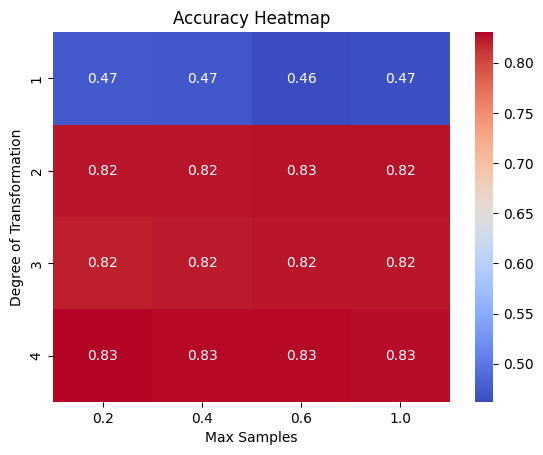

In [450]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='poly__degree', 
                             columns='bagging__max_samples', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
plt.title('Accuracy Heatmap')
plt.xlabel('Max Samples')
plt.ylabel('Degree of Transformation')
plt.show()

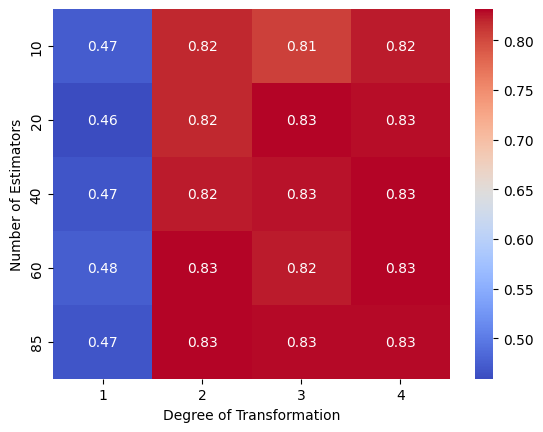

In [451]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='bagging__n_estimators', 
                             columns='poly__degree', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
#plt.title('Accuracy Heatmap')
plt.xlabel('Degree of Transformation')
plt.ylabel('Number of Estimators')
plt.show()


In [534]:
df = df[df['poly__degree'] != 1]

In [ ]:
# This

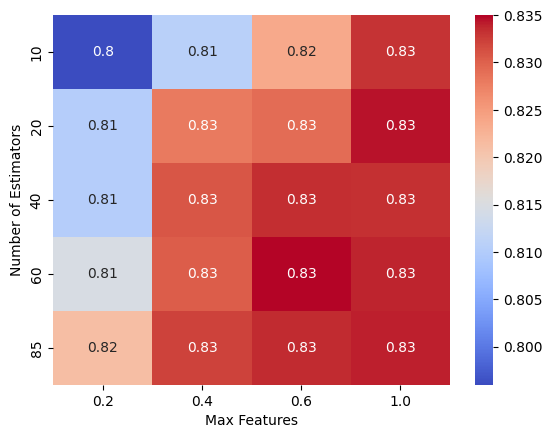

In [535]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='bagging__n_estimators', 
                             columns='bagging__max_features', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
#plt.title('Accuracy Heatmap')
plt.xlabel('Max Features')
plt.savefig("result_plots/circle_est_feats.pdf")
plt.ylabel('Number of Estimators')
plt.show()

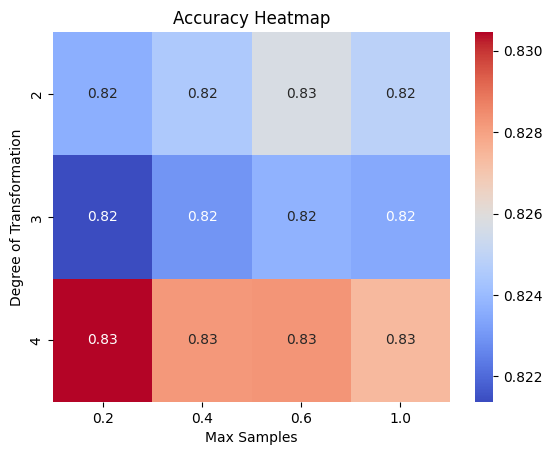

In [536]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='poly__degree', 
                             columns='bagging__max_samples', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
plt.title('Accuracy Heatmap')
plt.xlabel('Max Samples')
plt.ylabel('Degree of Transformation')
plt.show()

In [ ]:
# This

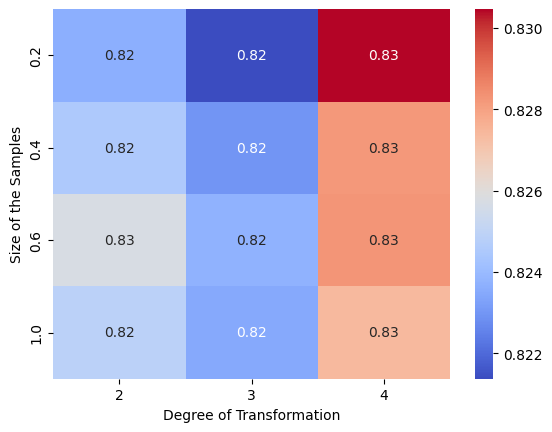

In [539]:
# Create a pivot table for accuracy
pivot_table = df.pivot_table(index='bagging__max_samples', 
                             columns='poly__degree', 
                             values='accuracy')

# Plot the heatmap for accuracy
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
#plt.title('Accuracy Heatmap')
plt.xlabel('Degree of Transformation')
plt.ylabel('Size of the Samples')
plt.savefig("result_plots/circle_samp_degree.pdf")
plt.show()
